# Honey and Bees 

## 1 Exploratory Data Analysis (EDA)

Import Packages

In [590]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.lines as mlines
import folium
import plotly.express as px

Load the Data

In [591]:
# Load Bees 
bees = pd.read_csv("Data/bees.csv")
# Load Honey 
honey = pd.read_csv("Data/honey.csv")
# Load Weather
weather = pd.read_csv("Data/weather.csv")

Create General Function for data investigation

In [592]:
def data_check(df):
    list = []
    cols = df.columns
    print("the shape of the underlying dataset: " + str(df.shape))
    for c in cols:
        d_types = df[c].dtypes
        d_nunique = df[c].nunique()
        d_unique = df[c].unique()
        any_null = df[c].isnull().any()
        sum_null = df[c].isnull().sum()
        portion_null = round(sum_null/df.shape[0] * 100,2)
        list.append([c, d_types, d_nunique, d_unique, any_null, sum_null, portion_null])
    data_check = pd.DataFrame(list)
    data_check.columns = ["Feature", "Datatypes", "Number of unique values", "Unique values", "Any missing values?", "Number of missing values", "Portion missing values (in %)"]
    return data_check

### 1.1 Exploring Honey, Bees and Weather Data

<b>Bees dataset </b>

In [593]:
bees.head(3)

,State,Date,Starting Colonies,Maximum Colonies,Lost Colonies,Added Colonies,Renovated Colonies,Percent Renovated,Varroa Mites (Percent),Other pests and parasites (Percent),Diseases (percent),Pesticides (percent),Other (percent),Unknown (percent),State_code,Latitude,Longitude
0,Alabama,2015-Q3,8500.0,9000.0,1400.0,160.0,260.0,3.0,63.1,70.6,NaN,2.6,2.2,17.7,AL,32.601011,-86.680736
1,Alabama,2015-Q4,8000.0,8000.0,610.0,80.0,60.0,1.0,3.1,6.4,0.2,0.2,2.8,1.9,AL,32.601011,-86.680736
2,Alabama,2016-Q1,7500.0,7500.0,1700.0,2100.0,90.0,1.0,24.2,22.0,4.3,8.1,2.4,11.3,AL,32.601011,-86.680736


In [594]:
data_check(bees)

the shape of the following dataset: (1125, 17)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,State,object,45,"[Alabama, Arizona, Arkansas, California, Color...",False,0,0.00
1,Date,object,25,"[2015-Q3, 2015-Q4, 2016-Q1, 2015-Q2, 2015-Q1, ...",False,0,0.00
2,Starting Colonies,float64,237,"[8500.0, 8000.0, 7500.0, 7000.0, 6500.0, 5500....",True,45,4.00
3,Maximum Colonies,float64,252,"[9000.0, 8000.0, 7500.0, 7000.0, 8500.0, 6500....",True,45,4.00
4,Lost Colonies,float64,225,"[1400.0, 610.0, 1700.0, 860.0, 1800.0, 830.0, ...",True,45,4.00
5,Added Colonies,float64,224,"[160.0, 80.0, 2100.0, 1900.0, 2800.0, 1600.0, ...",True,45,4.00
6,Renovated Colonies,float64,220,"[260.0, 60.0, 90.0, 680.0, 250.0, 1300.0, 10.0...",True,46,4.09
7,Percent Renovated,float64,50,"[3.0, 1.0, 9.0, 4.0, 15.0, 20.0, nan, 7.0, 11....",True,171,15.20
8,Varroa Mites (Percent),float64,549,"[63.1, 3.1, 24.2, 16.7, 10.0, 77.5, 20.6, 12.3...",True,50,4.44
9,Other pests and parasites (Percent),float64,327,"[70.6, 6.4, 22.0, 42.5, 5.4, 69.4, 20.5, 9.9, ...",True,82,7.29


Observations:

- 1125 entries
- 17 columns
- There are missing values for every column besides geographical and time information
- data formats: state_code, date and State are all string objects. All other columns consist of floats
- The bee dataset provides information on bee colonies (starting, maximum, lost, added, renovated) in each U.S. state (including state code and coordinates) and their health status (pests, parasites, diseases, other). The dataset covers 2015 through 2021 (from 2015-Q1 to 2021-Q1), and unlike the honey dataset, the bee dataset is available on a quarterly basis.

<b>Honey dataset </b>

In [595]:
honey.head(3)

,State,Honey producing colonies (thousand),Yield per colony (pounds),"Production (1,000 pounds)","Stocks December 15 (1,000 pounds)",Average price per pound (dollars),"Value of production (1,000 dollars)",Year
0,Alabama,7,47.0,329,13,3.83,1260,2015
1,Arizona,26,49.0,1274,306,2.17,2765,2015
2,Arkansas,24,72.0,1728,121,2.02,3491,2015


In [596]:
data_check(honey)

the shape of the following dataset: (252, 8)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,State,object,42,"[Alabama, Arizona, Arkansas, California, Color...",False,0,0.0
1,Honey producing colonies (thousand),int64,114,"[7, 26, 24, 275, 29, 220, 69, 14, 89, 8, 6, 36...",False,0,0.0
2,Yield per colony (pounds),float64,70,"[47.0, 49.0, 72.0, 30.0, 51.0, 54.0, 40.0, 102...",False,0,0.0
3,"Production (1,000 pounds)",int64,223,"[329, 1274, 1728, 8250, 1479, 11880, 2760, 142...",False,0,0.0
4,"Stocks December 15 (1,000 pounds)",int64,218,"[13, 306, 121, 1485, 399, 832, 221, 71, 1082, ...",False,0,0.0
5,Average price per pound (dollars),float64,186,"[3.83, 2.17, 2.02, 2.04, 2.18, 1.97, 2.42, 1.9...",False,0,0.0
6,"Value of production (1,000 dollars)",int64,247,"[1260, 2765, 3491, 16830, 3224, 23404, 6679, 2...",False,0,0.0
7,Year,int64,6,"[2015, 2016, 2017, 2018, 2019, 2020]",False,0,0.0


Observations:
- 252 entries
- 8 columns
- There are no missing values for any column
- The honey dataset shows honey production for each state in the U.S. and for the U.S. as a whole. Listed are the number of colonies, yield per colony, honey production, inventory levels, average price (per pound), and value of production for the various states. The time span is from 2015 to 2020, and the data is available on an annual basis

<b>Weather dataset </b>

In [597]:
weather.head(3)

,State_code,latitude,longitude,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,Group4,Group3
0,AK,61.303,-158.775,2015-01-01,-1.0,-7.0,-3.6,-1.0,-7.0,-3.6,...,0.0,NaN,94.5,11.3,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,61.303,-158.775,2015-01-02,-7.0,-14.0,-11.4,-7.0,-14.0,-11.4,...,0.0,NaN,28.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,61.303,-158.775,2015-01-03,-14.0,-19.0,-16.7,-14.0,-19.0,-16.7,...,0.0,NaN,29.9,16.0,NaN,NaN,NaN,NaN,NaN,NaN


In [598]:
data_check(weather)

the shape of the following dataset: (111792, 30)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,State_code,object,51,"[AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, H...",False,0,0.00
1,latitude,float64,50,"[61.303, 32.601, 34.752, 34.168, 37.272, 38.99...",False,0,0.00
2,longitude,float64,50,"[-158.775, -86.681, -92.131, -111.931, -119.27...",False,0,0.00
3,datetime,object,2192,"[2015-01-01, 2015-01-02, 2015-01-03, 2015-01-0...",False,0,0.00
4,tempmax,float64,688,"[-1.0, -7.0, -14.0, -18.0, -17.0, -9.0, -4.0, ...",True,812,0.73
5,tempmin,float64,653,"[-7.0, -14.0, -19.0, -22.0, -20.0, -21.0, -18....",True,812,0.73
6,temp,float64,678,"[-3.6, -11.4, -16.7, -20.4, -17.8, -19.0, -13....",True,4481,4.01
7,feelslikemax,float64,794,"[-1.0, -7.0, -14.0, -18.0, -17.0, -10.0, -5.0,...",True,855,0.76
8,feelslikemin,float64,774,"[-7.0, -14.0, -19.0, -22.0, -26.5, -27.7, -21....",True,855,0.76
9,feelslike,float64,764,"[-3.6, -11.4, -16.7, -20.4, -20.6, -23.3, -15....",True,4524,4.05


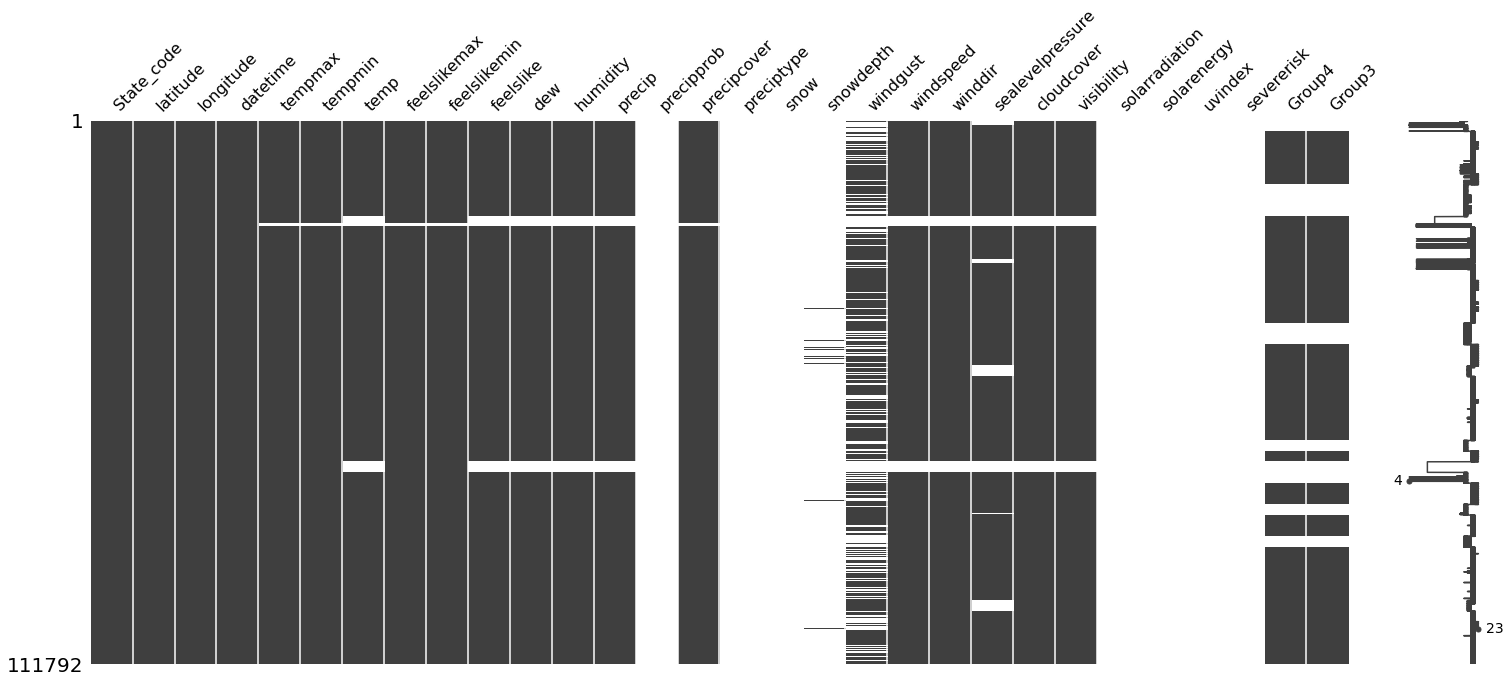

In [599]:
# Visualize missingness with Missingno
msno.matrix(weather)
plt.show()

Observation
- The weather dataset consists of 30 entries and 111792 columns
- Each entry represents information about the weather and geographical information for a US State on a certain day
- The datetime column data is in string format --> i have to convert it into the datetime datatype
- There are a lot of columns where the majority of values or all values are missing 
- I am going to drop them (severerisk, uvindex, solarenergy, solarradiation, snowdepth, snow, preciptype, precipprob )
- We got a hint that there is no weather data for Florida and New Mexico. Therefore we're gonna exlude these states from the data

### 1.1.2 Giving some overall statements

#### Which state had the most producing colonies ever and in which year? Anything special about that state?

In [600]:
# Create a copy of the honey dataset 
tmp = honey.copy()
# Exclude all entries that have United States as a state
tmp = tmp[tmp["State"]!="United States"]
# Select State and Year of the entry with the most producing colonies
tmp1 = tmp[tmp["Honey producing colonies (thousand)"]==tmp["Honey producing colonies (thousand)"].max()]
print(tmp1[["State","Honey producing colonies (thousand)", "Year"]].to_string(index=False))
# Adding .to_string(index=False) did display the result without the index.

       State  Honey producing colonies (thousand)  Year
North Dakota                                  530  2018


- What makes this state special is that North Dakota is one of the northernmost and coldest states in the nation (see https://www.marketplace.org/2016/10/21/why-honeybees-are-sweet-north-dakota/)

#### What state had the lowest price for honey. How low was it?

In [601]:
tmp2 = tmp[tmp["Average price per pound (dollars)"]==tmp["Average price per pound (dollars)"].min()]
print(tmp2[["State","Average price per pound (dollars)", "Year"]].to_string(index=False))


 State  Average price per pound (dollars)  Year
Hawaii                               1.28  2019


#### What is the total Honey production for 2016 in the United States?

In [602]:
tmp3 = honey[(honey["Production (1,000 pounds)"] == honey["Production (1,000 pounds)"].max()) & (honey.Year == 2016)]
print(tmp3[["Production (1,000 pounds)"]].to_string(index=False))

 Production (1,000 pounds)
                    161882


### 1.2 Data Cleaning and Useful Transformations

#### 1.2.1 Date Formatting
From exploring the data in the previous steps I  have noticed the differences in frequency
of the data. The date (format) of the bees set is quarterly, whereas we have yearly honey data.
Therefore we should translate the Date column to a fitting date format. Furthermore, the Year column in the honey dataset has the datatype INT. Therefore we have to translate the Year column to datetime type.

In [603]:
bees["Date"] = pd.to_datetime(bees["Date"])
honey["Year"] = pd.to_datetime(honey["Year"], format="%Y")

In [604]:
honey.Year = pd.to_datetime(honey.Year, format="%Y")  # assumes start of year 01.01 by convention
bees.Date = pd.to_datetime(bees.Date)
weather.datetime = pd.to_datetime(weather.datetime)

#### 1.2.2 More Data Types
To me, it looks like all variables I would assume to contain numeric data actually contain numeric data. Variables we expect to contain strings are of object type. That is why I did not to change aspects here anymore.

#### 1.2.3 Converting Units
From the column names I can see that the honey data set is in pounds as we are dealing with an U.S. data set. However, we are devoted followers of the metric system and do not easily understand pounds. Consequently, we would like to translate them to kilogram [kg]. 

It is best practice to create a new variable from the old one that you are modifying. Therefore, while i am at it, i will give my new variables, now in kg, a shorter name no spaces in it. 

In [605]:
pound = 0.453592
honey["honey_producing_colonies"] = honey["Honey producing colonies (thousand)"] 
honey["yield_colony_kg"] = honey["Yield per colony (pounds)"] * pound
honey["production_kg"] = honey["Production (1,000 pounds)"] * pound  
honey["stock_price_kg"] = honey["Stocks December 15  (1,000 pounds) "] /1000 * pound * 100
honey["avg_price_kg"] = honey["Average price per pound (dollars)"] * pound
honey["prod_value"] = honey["Value of production (1,000 dollars)"]  # * 1000

# Delete old columns that were using pounds
honey.drop(
    ["Honey producing colonies (thousand)", "Yield per colony (pounds)", "Production (1,000 pounds)",
     "Stocks December 15  (1,000 pounds) ", "Average price per pound (dollars)", "Value of production (1,000 dollars)"],
    axis=1,
    inplace=True,
    )
# Display updated dataset 
honey.head(3)

,State,Year,honey_producing_colonies,yield_colony_kg,production_kg,stock_price_kg,avg_price_kg,prod_value
0,Alabama,2015-01-01,7,21.318824,149.231768,0.589670,1.737257,1260
1,Arizona,2015-01-01,26,22.226008,577.876208,13.879915,0.984295,2765
2,Arkansas,2015-01-01,24,32.658624,783.806976,5.488463,0.916256,3491


#### 1.2.4 Rounding

In [606]:
# Rounding columns values to two decimals 
honey = round(honey,2)
# Dataset after rounding column values
honey.head()

,State,Year,honey_producing_colonies,yield_colony_kg,production_kg,stock_price_kg,avg_price_kg,prod_value
0,Alabama,2015-01-01,7,21.32,149.23,0.59,1.74,1260
1,Arizona,2015-01-01,26,22.23,577.88,13.88,0.98,2765
2,Arkansas,2015-01-01,24,32.66,783.81,5.49,0.92,3491
3,California,2015-01-01,275,13.61,3742.13,67.36,0.93,16830
4,Colorado,2015-01-01,29,23.13,670.86,18.10,0.99,3224


### 1.3 Simple Metrics

#### 1.3.1 Missing Values

In [607]:
# Saving current state before further manipulation of the original file
beesoriginal=bees

In [608]:
data_check(bees)[["Feature", "Any missing values?", "Number of missing values"]]

the shape of the following dataset: (1125, 17)


,Feature,Any missing values?,Number of missing values
0,State,False,0
1,Date,False,0
2,Starting Colonies,True,45
3,Maximum Colonies,True,45
4,Lost Colonies,True,45
5,Added Colonies,True,45
6,Renovated Colonies,True,46
7,Percent Renovated,True,171
8,Varroa Mites (Percent),True,50
9,Other pests and parasites (Percent),True,82


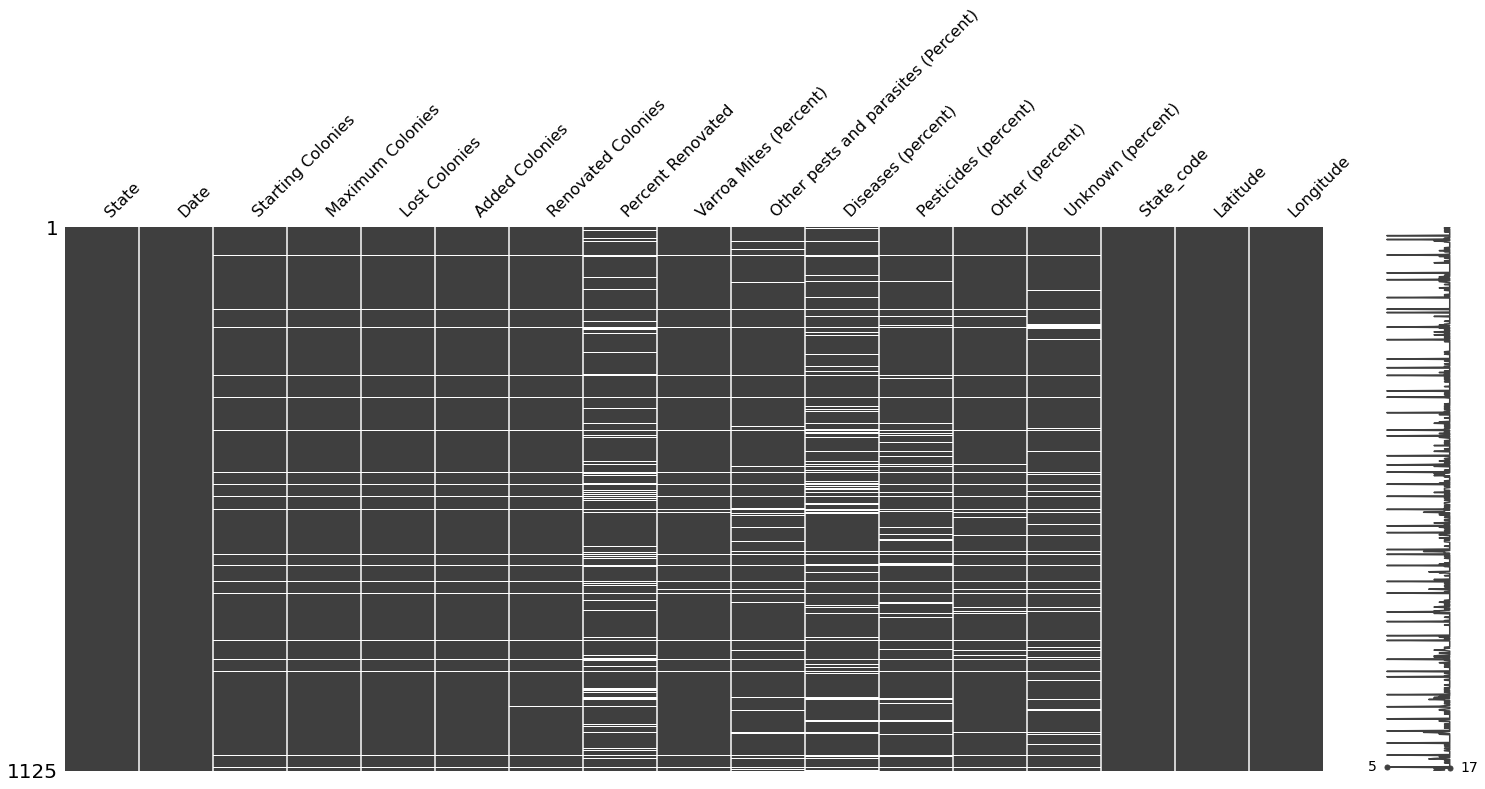

In [609]:
# Visualize missingness with Missingno
msno.matrix(bees)
plt.show()

Observation
- From the plot we can see that many bee colonies that are just missing from the beginning on are also missing throughout the set. I would therefore remove the rows with missing values on 'Starting Colonies' as the dataset is kind of useless without starting colonies. This would remove 45 entries from the dataset 


##### Starting Colonies

In [610]:
# Drop rows with missing values in the "Starting Colonies" column
bees = bees.dropna(subset=["Starting Colonies"])
data_check(bees)[["Feature", "Any missing values?", "Number of missing values"]]

the shape of the following dataset: (1080, 17)


,Feature,Any missing values?,Number of missing values
0,State,False,0
1,Date,False,0
2,Starting Colonies,False,0
3,Maximum Colonies,False,0
4,Lost Colonies,False,0
5,Added Colonies,False,0
6,Renovated Colonies,True,1
7,Percent Renovated,True,126
8,Varroa Mites (Percent),True,5
9,Other pests and parasites (Percent),True,37


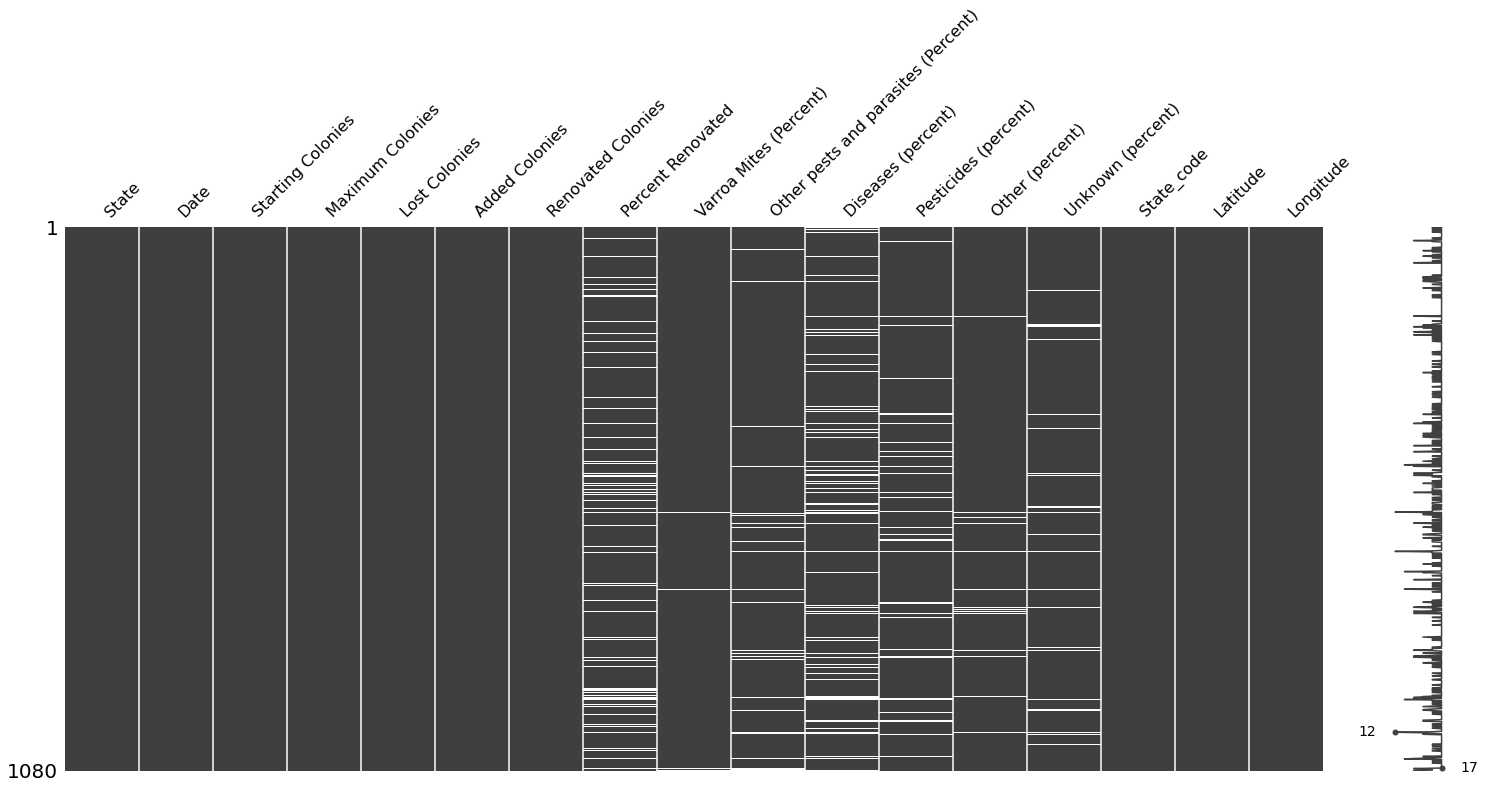

In [611]:
# Visualize missingness with Missingno after dropping rows with missing values in the "Starting Colonies" column
msno.matrix(bees)
plt.show()

In [612]:
bees[["Starting Colonies", "Added Colonies","Renovated Colonies", "Percent Renovated" ]].head(10)

,Starting Colonies,Added Colonies,Renovated Colonies,Percent Renovated
0,8500.0,160.0,260.0,3.0
1,8000.0,80.0,60.0,1.0
2,7500.0,2100.0,90.0,1.0
3,7500.0,1900.0,680.0,9.0
4,7000.0,2800.0,250.0,4.0
5,8500.0,1600.0,1300.0,15.0
6,6500.0,210.0,1300.0,20.0
7,7000.0,50.0,10.0,NaN
8,5500.0,800.0,200.0,4.0
9,8000.0,1200.0,690.0,9.0


In [613]:
bees["Renovated Colonies"]/(bees["Starting Colonies"] + bees["Added Colonies"])

0       0.030023
1       0.007426
2       0.009375
3       0.072340
4       0.025510
          ...   
1120    0.013483
1121    0.095890
1122    0.222949
1123    0.016408
1124    0.088889
Length: 1080, dtype: float64

Observation
- The "Percent Renovated Colonies" column is very similar to the result of Renovated Colonies/(Starting Colonies + Added Colonies)
- Therefore I will the missing values in the "Percent Renovated Colonies" column with the relation of renovated colonies to starting plus added colonies
- This seems to be a close enough estimation and is definitely better than filling random means or values from before/after.

In [614]:
bees = bees.fillna({'Percent Renovated': (bees['Renovated Colonies']/(bees['Starting Colonies'] + bees['Added Colonies']))*100})

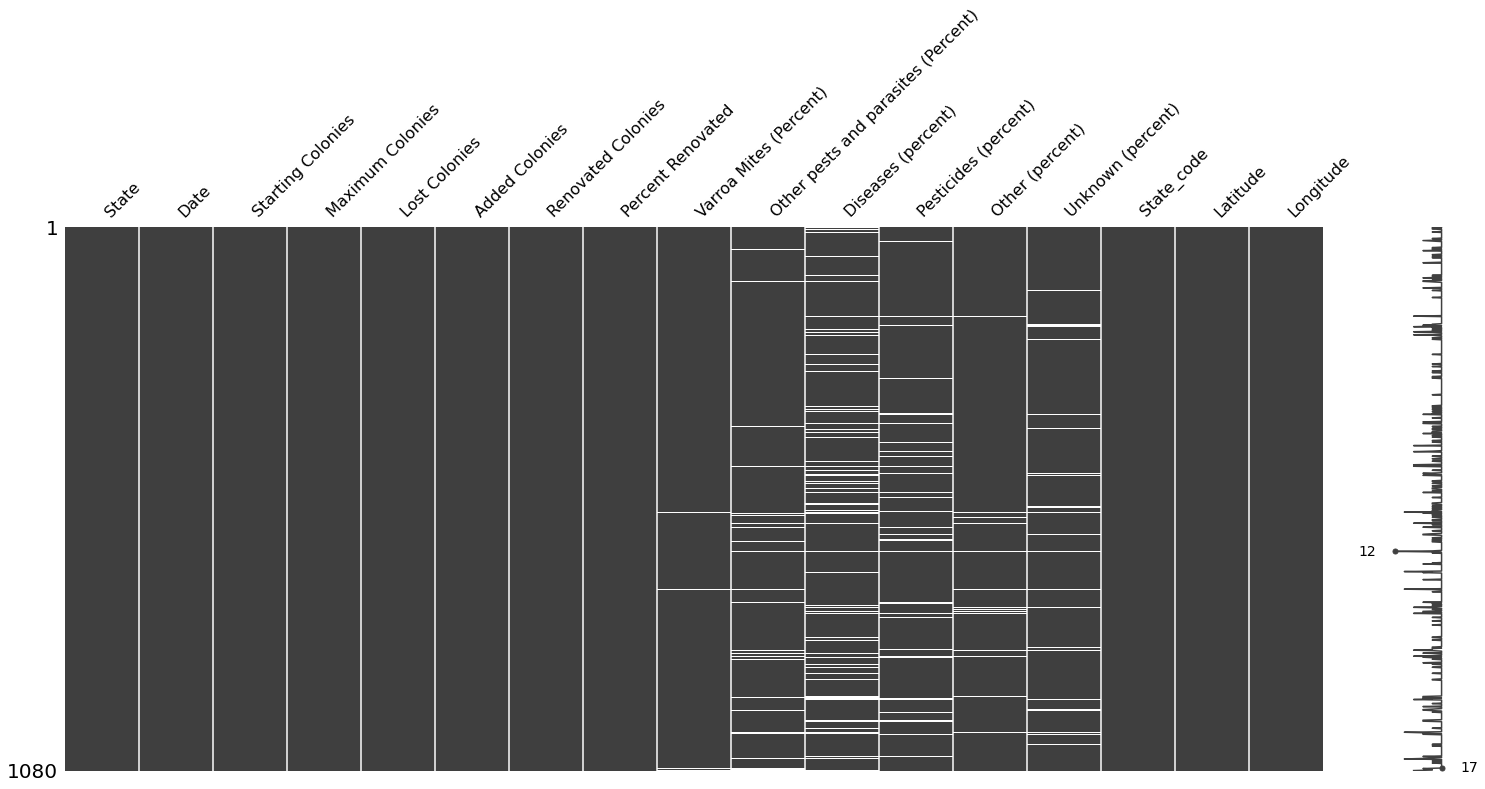

In [615]:
# Visualize missingness with Missingno after filling missing values in "Percent Renovated" column 
msno.matrix(bees)
plt.show()

##### Other Missings
In the following, I will try to find patterns in the remaining missing data 

<AxesSubplot:>

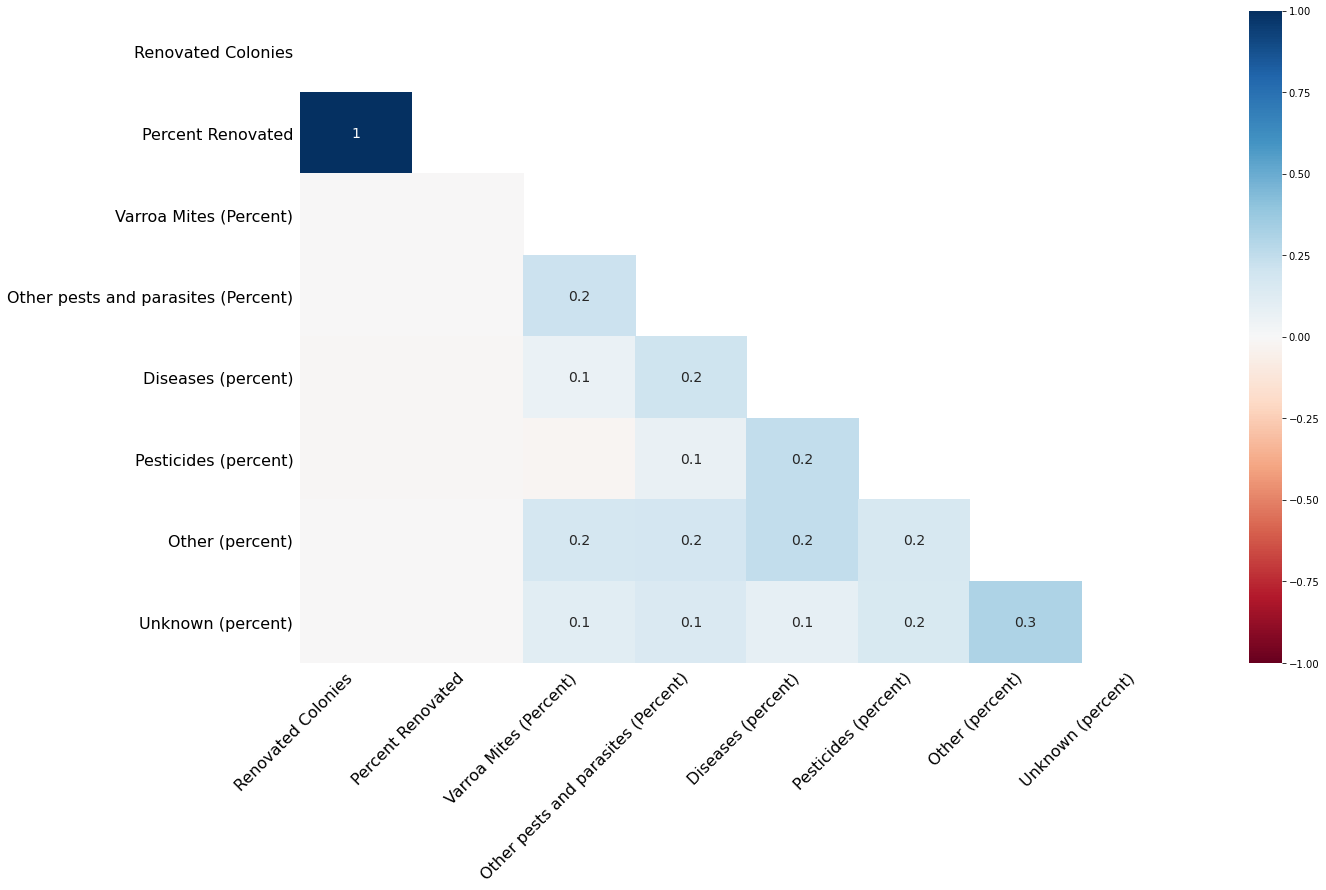

In [616]:
# Graph of correlation between columns 
# to better understand the dependencies between columns
msno.heatmap(bees)

Observation
- I can not see a clear pattern in the remaining missing data, which is why I will fill it using the forward fill function.

In [617]:
# Perform a forward fill to replace missing values in the DataFrame.
# Forward filling (ffill) replaces NaN values with the most recent known value in the same column.
# This is done to handle missing data and ensure that time-series or sequential data remains continuous.
# By using forward fill, we maintain the consistency of data over time.
bees.fillna(method='ffill', inplace=True)

In [618]:
data_check(bees)

the shape of the following dataset: (1080, 17)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,State,object,45,"[Alabama, Arizona, Arkansas, California, Color...",False,0,0.00
1,Date,datetime64[ns],24,"[2015-07-01T00:00:00.000000000, 2015-10-01T00:...",False,0,0.00
2,Starting Colonies,float64,237,"[8500.0, 8000.0, 7500.0, 7000.0, 6500.0, 5500....",False,0,0.00
3,Maximum Colonies,float64,252,"[9000.0, 8000.0, 7500.0, 7000.0, 8500.0, 6500....",False,0,0.00
4,Lost Colonies,float64,225,"[1400.0, 610.0, 1700.0, 860.0, 1800.0, 830.0, ...",False,0,0.00
5,Added Colonies,float64,224,"[160.0, 80.0, 2100.0, 1900.0, 2800.0, 1600.0, ...",False,0,0.00
6,Renovated Colonies,float64,220,"[260.0, 60.0, 90.0, 680.0, 250.0, 1300.0, 10.0...",False,0,0.00
7,Percent Renovated,float64,174,"[3.0, 1.0, 9.0, 4.0, 15.0, 20.0, 0.14184397163...",False,0,0.00
8,Varroa Mites (Percent),float64,549,"[63.1, 3.1, 24.2, 16.7, 10.0, 77.5, 20.6, 12.3...",False,0,0.00
9,Other pests and parasites (Percent),float64,327,"[70.6, 6.4, 22.0, 42.5, 5.4, 69.4, 20.5, 9.9, ...",False,0,0.00


Observation
- There is still one missing value in the Diseases column left 
- I will use a bfill to fill the last missing value

In [619]:
bees.fillna(method='bfill', inplace=True)

##### Comparison between original bees dataset and cleaned data set  

In [620]:
# Original dataset 
beesoriginal.describe()

,Starting Colonies,Maximum Colonies,Lost Colonies,Added Colonies,Renovated Colonies,Percent Renovated,Varroa Mites (Percent),Other pests and parasites (Percent),Diseases (percent),Pesticides (percent),Other (percent),Unknown (percent),Latitude,Longitude
count,1.080000e+03,1.080000e+03,1080.000000,1080.000000,1079.000000,954.000000,1075.000000,1043.000000,969.000000,1010.000000,1057.000000,1031.000000,1125.000000,1125.000000
mean,6.424185e+04,8.056213e+04,8968.324074,8416.296296,7328.239110,7.994759,30.602326,11.635570,4.058204,6.934455,6.363009,4.399806,38.696726,-92.476463
std,1.528138e+05,1.929380e+05,24299.355001,23947.084866,23282.349284,9.532348,19.399671,13.733749,7.303941,9.658690,6.624920,5.363905,5.413119,16.572612
min,1.300000e+03,1.300000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.460000,-157.505000
25%,8.000000e+03,9.000000e+03,980.000000,370.000000,130.000000,2.000000,16.100000,2.300000,0.400000,0.700000,2.000000,1.000000,35.214563,-100.247164
50%,1.750000e+04,2.200000e+04,2200.000000,1600.000000,730.000000,5.000000,27.500000,7.200000,1.600000,3.100000,4.400000,2.700000,38.997934,-89.826705
75%,5.200000e+04,7.125000e+04,7000.000000,5500.000000,3400.000000,11.000000,42.800000,15.600000,4.800000,9.175000,8.300000,5.600000,42.062940,-80.181691
max,1.440000e+06,1.710000e+06,255000.000000,250000.000000,285000.000000,77.000000,98.800000,91.900000,87.400000,73.500000,61.400000,46.200000,47.467882,-69.014866


In [621]:
# Cleaned dataset 
bees.describe()

,Starting Colonies,Maximum Colonies,Lost Colonies,Added Colonies,Renovated Colonies,Percent Renovated,Varroa Mites (Percent),Other pests and parasites (Percent),Diseases (percent),Pesticides (percent),Other (percent),Unknown (percent),Latitude,Longitude
count,1.080000e+03,1.080000e+03,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,6.424185e+04,8.056213e+04,8968.324074,8416.296296,7321.472222,7.094646,30.615370,11.434259,3.971574,6.819352,6.473148,4.351481,38.696726,-92.476463
std,1.528138e+05,1.929380e+05,24299.355001,23947.084866,23272.620446,9.295146,19.389654,13.654072,7.127624,9.578213,7.041569,5.370071,5.413219,16.572919
min,1.300000e+03,1.300000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.460000,-157.505000
25%,8.000000e+03,9.000000e+03,980.000000,370.000000,130.000000,1.000000,16.100000,2.300000,0.300000,0.600000,2.000000,1.000000,35.214563,-100.247164
50%,1.750000e+04,2.200000e+04,2200.000000,1600.000000,725.000000,4.000000,27.500000,7.100000,1.500000,3.000000,4.350000,2.700000,38.997934,-89.826705
75%,5.200000e+04,7.125000e+04,7000.000000,5500.000000,3400.000000,10.000000,42.800000,15.425000,4.700000,9.100000,8.400000,5.525000,42.062940,-80.181691
max,1.440000e+06,1.710000e+06,255000.000000,250000.000000,285000.000000,77.000000,98.800000,91.900000,87.400000,73.500000,61.400000,46.200000,47.467882,-69.014866


Observation
- The new dataframe does not appear to differ significantly from the original one. Means and Standard deviations look near identical.

#### 1.3.2 Lost Colonies
I calculate a new column, 'lost_colonies_pct', to represent the percentage of lost colonies relative to the maximum colonies for each quarter. The Column is presented in Percentage points (rounded by 2 decimal)

In [622]:
bees["lost_colonies_percent"] = round(((bees["Lost Colonies"] / bees["Maximum Colonies"]) * 100),2)
bees["lost_colonies_percent"]

0       15.56
1        7.62
2       22.67
3       11.47
4       25.71
        ...  
1120     0.82
1121     6.67
1122    10.59
1123     6.40
1124    11.72
Name: lost_colonies_percent, Length: 1080, dtype: float64

#### 1.3.3 Yearly aggregate
To make things easier, I am going to merge the honey and bees data set to analyze them jointly. 
However,both data sets have different frequencies. Therefore, I need to aggregate the quarterly bee data set to a yearly frequency. In the end, data for just the year from 2015-2020 for each state should be left. I have decided that that it is best to aggregate the data (over the four quarters) by using the mean.

In [623]:
bees["State"]

0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
1120    Wyoming
1121    Wyoming
1122    Wyoming
1123    Wyoming
1124    Wyoming
Name: State, Length: 1080, dtype: object

In [624]:
### Create a new dataframe based on the honey dataset that contains bee data aggregated to yearly frequency
bees_grped = bees.groupby(["State", bees.Date.dt.year]).mean().reset_index(level=1).sort_values(["State","Date"])
# group_by with reset_index does not preserve dtypes
bees_grped.Date = pd.to_datetime(bees_grped.Date, format="%Y")

In the following i will plot the number of Lost Colonies over time in Wyoming

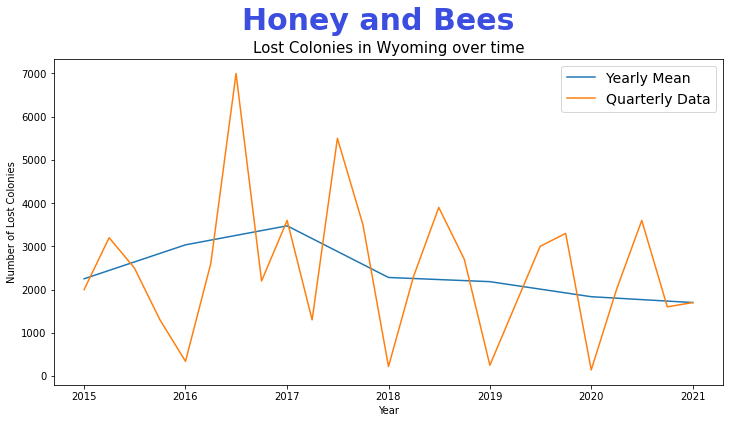

<Figure size 432x288 with 0 Axes>

In [629]:
# plotting (formatting) is not done via UDF so that each cell is somewhat stand-alone
state = "Wyoming"
suptitle = "Honey and Bees"
title = f"Lost Colonies in {state} over time"
fig, ax = plt.subplots(figsize=(12,6))
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Year')
plt.ylabel('Number of Lost Colonies')

# plot data
df1 = bees_grped.loc[state]
df2 = bees[bees["State"]==state]
ax.plot(df1.Date, df1["Lost Colonies"], label="Yearly Mean")
ax.plot(df2.Date, df2["Lost Colonies"], label="Quarterly Data")
ax.legend(loc="upper right", fontsize=14)

plt.show()
plt.savefig("images/Wymoning", dpi=200)
plt.show()


<Figure size 432x288 with 0 Axes>

### 1.4 Merging Data Sets
When preparing to merge data sets, it is wise to check the naming of columns again. I will try to avoid having columns with the same name to avoid confusion, except for variable that I am merging by. 
I should keep in mind by which variables i want to merge by beforehand. Please give your bees data columns appropriate names (we recommend names where empty spaces are replaced with an underscore “_“), if you have not done so for the honey data set please do the same.

In [479]:
# check the column names of the bees_grped and honey dataframes
print(bees_grped.columns)
print(honey.columns)

Index(['Date', 'Starting Colonies', 'Maximum Colonies', 'Lost Colonies',
       'Added Colonies', 'Renovated Colonies', 'Percent Renovated',
       'Varroa Mites (Percent)', 'Other pests and parasites (Percent)',
       'Diseases (percent)', 'Pesticides (percent)', 'Other (percent)',
       'Unknown (percent)', 'Latitude', 'Longitude', 'lost_colonies_percent'],
      dtype='object')
Index(['State', 'Year', 'honey_producing_colonies', 'yield_colony_kg',
       'production_kg', 'stock_price_kg', 'avg_price_kg', 'prod_value'],
      dtype='object')


#### 1.4.0 Preparing Merge by renaming columns

In [480]:
# Giving bees_aggregated data columns appropriate names
bees_grped.rename(
    columns={
    "Starting Colonies": "starting_cols",
    "Maximum Colonies": "max_cols",
    "Lost Colonies": "lost_cols",
    "Added Colonies": "added_cols",
    "Diseases (percent)": "diseases_perc",
    "Other pests and parasites (Percent)": "other_pest_parasites_perc",
    "Other (percent)": "other_perc",
    "Unknown (percent)": "unknown_perc",
    "Percent Renovated": "perc_renovated",
    "Renovated Colonies": "renovated_cols",
    "Pesticides (percent)": "pesticides_perc",
    "Varroa Mites (Percent)": "varroa_mites_perc",
},
    inplace=True,
)
bees_grped

,Date,starting_cols,max_cols,lost_cols,added_cols,renovated_cols,perc_renovated,varroa_mites_perc,other_pest_parasites_perc,diseases_perc,pesticides_perc,other_perc,unknown_perc,Latitude,Longitude,lost_colonies_percent
State,,,,,,,,,,,,,,,,
Alabama,2015-01-01,7750.000000,7875.000000,1167.500000,1235.000000,312.5,4.250000,23.225000,31.225000,2.250000,1.825000,4.325000,8.275,32.601011,-86.680736,15.0900
Alabama,2016-01-01,7625.000000,7625.000000,1110.000000,947.500000,210.0,2.785461,14.450000,20.525000,1.275000,4.000000,4.275000,8.450,32.601011,-86.680736,14.5000
Alabama,2017-01-01,7000.000000,7625.000000,982.500000,752.500000,567.5,8.000000,32.400000,13.900000,2.250000,13.075000,6.325000,5.925,32.601011,-86.680736,13.0750
Alabama,2018-01-01,7375.000000,7750.000000,1000.000000,1177.500000,1202.5,15.750000,38.125000,36.850000,1.300000,11.350000,7.300000,5.225,32.601011,-86.680736,12.8375
Alabama,2019-01-01,6166.666667,6166.666667,766.666667,400.000000,200.0,3.333333,34.833333,24.666667,1.766667,1.800000,7.266667,8.900,32.601011,-86.680737,12.3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,2017-01-01,21125.000000,28000.000000,3475.000000,3225.000000,1830.0,5.750000,23.525000,1.875000,7.625000,3.275000,5.000000,1.925,43.000325,-107.554567,13.2150
Wyoming,2018-01-01,19250.000000,25750.000000,2280.000000,1897.500000,1525.0,4.750000,22.425000,2.775000,1.750000,4.475000,2.225000,2.500,43.000325,-107.554567,7.6400
Wyoming,2019-01-01,19166.666667,21500.000000,2183.333333,866.666667,1330.0,5.000000,24.666667,4.233333,2.200000,0.733333,3.700000,6.000,43.000325,-107.554567,8.5100


In [481]:
# Giving honey data columns appropriate names
honey.rename(columns={"Honey producing colonies (thousand)":"honey_producing_colonies_in_k","Value of production (1,000 dollars)":"value_in_k"}, inplace=True)
honey.head()

,State,Year,honey_producing_colonies,yield_colony_kg,production_kg,stock_price_kg,avg_price_kg,prod_value
0,Alabama,2015-01-01,7,21.32,149.23,0.59,1.74,1260
1,Arizona,2015-01-01,26,22.23,577.88,13.88,0.98,2765
2,Arkansas,2015-01-01,24,32.66,783.81,5.49,0.92,3491
3,California,2015-01-01,275,13.61,3742.13,67.36,0.93,16830
4,Colorado,2015-01-01,29,23.13,670.86,18.10,0.99,3224


#### 1.4.1 Joint Honey and Bees Set

In [482]:
# Check to what extent honey and bees_grped match
print(bees_grped.shape)
print(honey.shape)
# check if the same states are included in both datasets
unique_states = bees_grped.index.get_level_values('State').unique()
# the following states are included in bees_aggregated but not in the honey dataset 
print("\n")
print("The following states are included in bees_aggregated but not in the honey dataset:")
set(unique_states)-set(honey["State"].unique())

(315, 16)
(252, 8)


The following states are included in bees_aggregated but not in the honey dataset:


{'Connecticut', 'Maryland', 'Massachusetts', 'New Mexico', 'Oklahoma'}

Observations
- The two datasets do not match for following reasons
- different shapes: both dataframes have a different number of entries 
- Some States are included in honey but not in the bees_aggregated dataset and vice versa
- Merging will lead to a loss of information regarding some States

In [483]:
bees_and_honey = bees_grped.merge(honey, left_on=["State", "Date"], right_on=["State", "Year"]).sort_values(by=["State", "Date"])
data_check(bees_and_honey)

the shape of the following dataset: (240, 24)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,State,object,40,"[Alabama, Arizona, Arkansas, California, Color...",False,0,0.0
1,Date,datetime64[ns],6,"[2015-01-01T00:00:00.000000000, 2016-01-01T00:...",False,0,0.0
2,starting_cols,float64,204,"[7750.0, 7625.0, 7000.0, 7375.0, 6166.66666666...",False,0,0.0
3,max_cols,float64,208,"[7875.0, 7625.0, 7750.0, 6166.666666666667, 12...",False,0,0.0
4,lost_cols,float64,219,"[1167.5, 1110.0, 982.5, 1000.0, 766.6666666666...",False,0,0.0
5,added_cols,float64,231,"[1235.0, 947.5, 752.5, 1177.5, 400.0, 2287.5, ...",False,0,0.0
6,renovated_cols,float64,231,"[312.5, 210.0, 567.5, 1202.5, 200.0, 1107.5, 1...",False,0,0.0
7,perc_renovated,float64,162,"[4.25, 2.7854609929078014, 8.0, 15.75, 3.33333...",False,0,0.0
8,varroa_mites_perc,float64,230,"[23.225, 14.45, 32.4, 38.125, 34.8333333333333...",False,0,0.0
9,other_pest_parasites_perc,float64,221,"[31.225, 20.525, 13.9, 36.85, 24.6666666666666...",False,0,0.0


### 1.5 States Bar Plot
In the following I will create a bar plot with all states starting bee colonies for the year 2020. 

In [484]:
bees_and_honey["Date"].unique()

array(['2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [485]:
# filter all entries from the year 2020 and sort by starting colonies 
bees_and_honey_20 = bees_and_honey[bees_and_honey["Date"]=="2020-01-01"].sort_values(by="starting_cols", ascending=False)
bees_and_honey_20["starting_cols"] = bees_and_honey_20["starting_cols"]/1000 # Starting cols in thousands
bees_and_honey_20_median = bees_and_honey_20["starting_cols"].median()
bees_and_honey_20_mean = bees_and_honey_20["starting_cols"].mean()


In [486]:
bees_and_honey_20.head()

,State,Date,starting_cols,max_cols,lost_cols,added_cols,renovated_cols,perc_renovated,varroa_mites_perc,other_pest_parasites_perc,...,Latitude,Longitude,lost_colonies_percent,Year,honey_producing_colonies,yield_colony_kg,production_kg,stock_price_kg,avg_price_kg,prod_value
23,California,2020-01-01,972.50,1252500.0,140750.0,149000.0,118000.0,10.75,33.850,8.325,...,37.271875,-119.270415,10.8375,2020-01-01,320,19.50,6241.43,124.83,0.81,24493
35,Florida,2020-01-01,266.25,283750.0,32000.0,38000.0,18750.0,7.00,37.250,17.950,...,27.975728,-83.833017,11.3375,2020-01-01,192,20.87,4006.12,40.05,1.03,20137
155,North Dakota,2020-01-01,255.00,359250.0,31375.0,30625.0,17750.0,4.00,37.725,4.525,...,47.467882,-100.302266,8.6975,2020-01-01,495,35.38,17513.19,367.77,0.73,61776
197,Texas,2020-01-01,226.50,288250.0,30625.0,33500.0,42300.0,11.75,22.500,8.650,...,31.169336,-100.076842,10.4325,2020-01-01,157,25.85,4059.19,56.84,0.86,17003
41,Georgia,2020-01-01,143.75,150750.0,19375.0,23125.0,22000.0,14.75,45.975,14.600,...,32.678125,-83.222976,12.5825,2020-01-01,101,15.42,1557.63,18.69,1.07,8104


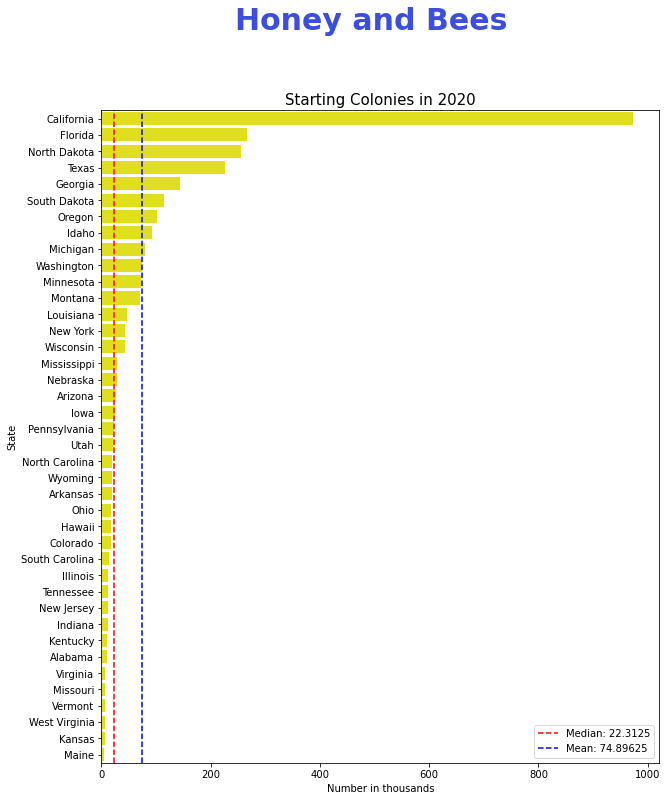

In [487]:
suptitle = "Honey and Bees"
title = "Starting Colonies in 2020"
fig, ax = plt.subplots(figsize=(10,12))


plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title("Starting Colonies in 2020", fontsize=15)
sns.barplot(x="starting_cols", y="State", data=bees_and_honey_20, color="yellow")
plt.ylabel('State')
plt.xlabel("Number in thousands")
# Add dashed lines for Median and Mean
plt.axvline(x=bees_and_honey_20_median, color='red', linestyle='--', label=f'Median: {bees_and_honey_20_median}')
plt.axvline(x=bees_and_honey_20_mean, color='blue', linestyle='--', label=f'Mean: {bees_and_honey_20_mean}')

plt.legend()

### 1.6 Visualization with Maps

#### 1.6.1 Geographic Map with State Pop-ups
In the following I am going to use folium to create an interactive map about bee colonies in 2020. I will include information on Maximum Colonies, Lost Colonies, Honey Production & Stock Price. 

In [488]:
bees_and_honey_20.columns

Index(['State', 'Date', 'starting_cols', 'max_cols', 'lost_cols', 'added_cols',
       'renovated_cols', 'perc_renovated', 'varroa_mites_perc',
       'other_pest_parasites_perc', 'diseases_perc', 'pesticides_perc',
       'other_perc', 'unknown_perc', 'Latitude', 'Longitude',
       'lost_colonies_percent', 'Year', 'honey_producing_colonies',
       'yield_colony_kg', 'production_kg', 'stock_price_kg', 'avg_price_kg',
       'prod_value'],
      dtype='object')

In [639]:
import folium
# Initiate the map
m = folium.Map(
    location=[39, -101],  # Somewhat central U.S.A
    zoom_start=3.5,
    tiles='Stamen Terrain',  # one of many Map Styles
    width='100%',  # Set the width to 80% of the available space
    height='100%'  # Set the height to 80% of the available space
)

#folium.Marker(
 #   location=[honey_bees_2020[honey_bees_2020["State"]=="California"]["latitude"],honey_bees_2020[honey_bees_2020["State"]=="California"]["longitude"]],
  #  popup="<b> Maximum Colonies: </b> {max_cols} <b> Lost Colonies: </b>{lost_cols} <b>Honey Production:</b> {production_kg}  <b>Price($/kg):  </b>{avg_price_kg} ".format(max_cols = honey_bees_2020[honey_bees_2020["State"]=="California"]["max_cols"][honey_bees_2020[honey_bees_2020["State"]=="California"]["max_cols"].index[0]],lost_cols = honey_bees_2020[honey_bees_2020["State"]=="California"]["lost_cols"][honey_bees_2020[honey_bees_2020["State"]=="California"]["lost_cols"].index[0]] , production_kg = honey_bees_2020[honey_bees_2020["State"]=="California"]["production_kg"][honey_bees_2020[honey_bees_2020["State"]=="California"]["production_kg"].index[0]] , avg_price_kg = honey_bees_2020[honey_bees_2020["State"]=="California"]["avg_price_kg"][honey_bees_2020[honey_bees_2020["State"]=="California"]["avg_price_kg"].index[0]]   ),
   # tooltip="California",
    #icon=None,).add_to(m)
# Create a list with all states
States = list(bees_and_honey_20["State"].unique())
# Use a for-loop to plot circles
for state in States:
    # Create a dataframe that only contains information of the current state
    df = bees_and_honey_20[bees_and_honey_20["State"]==state]
    df.head(1)
    folium.Marker(
    location=[df["Latitude"],df["Longitude"]],
    popup="<b><u>{state}</u></b> <b> Maximum Colonies: </b> {max_cols} <b> Lost Colonies: </b>{lost_cols} <b>Honey Production:</b> {production_kg}  <b>Price($/kg):  </b>{avg_price_kg} ".format(state = state, max_cols = df["max_cols"][df["max_cols"].index[0]],lost_cols = df["lost_cols"][df["lost_cols"].index[0]] , production_kg = df["production_kg"][df["production_kg"].index[0]] , avg_price_kg = df["avg_price_kg"][df["avg_price_kg"].index[0]]), # ....index[0] is necessary because otherwise it will output the index as well
    tooltip=state,
    icon=None,).add_to(m)
    
title_h2_html = f'<h2 style="text-align:center; line-height: 0px; margin-bottom:-2px; color:#3C4EE0"> 2020 Bee Colonies in the U.S.A.</h2>'
title_h3_html = '<h4 style="text-align:center; line-height: 0px; margin-bottom:15px; color:black" >Yearly Average Statistics</h4>'
title_html = title_h2_html + '<br>' + title_h3_html
m.get_root().html.add_child(folium.Element(title_html))
m  # Displays the map

## 2 Seasonality and Geographic Differences – Application of Statistical Methods

### 2.1 Cleaning and Preparing the Weather Dataset

In [490]:
# Drop Columns that contain (almost) only missing values 
weather.dropna(how='all', axis=1, inplace=True) # Drops all columns without any values
weather.drop("snowdepth", axis=1, inplace=True) # Drop column because 98% of its values are missing

# Drop Rows that contain Florida or New Mexico because there is no weather data for Florida and New Mexico,
print("Shape before excluding FL and NM:")
print(weather.shape)
weather = weather[(weather.State_code != "FL") & (weather.State_code != "NM")]
print("Shape after excluding FL and NM:")
print(weather.shape)
weather.head()

Shape before excluding FL and NM:
(111792, 22)
Shape after excluding FL and NM:
(107408, 22)


,State_code,latitude,longitude,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,Group4,Group3
0,AK,61.303,-158.775,2015-01-01,-1.0,-7.0,-3.6,-1.0,-7.0,-3.6,...,0.0,0.0,NaN,0.0,0.0,NaN,94.5,11.3,NaN,NaN
1,AK,61.303,-158.775,2015-01-02,-7.0,-14.0,-11.4,-7.0,-14.0,-11.4,...,0.0,0.0,NaN,0.0,0.0,NaN,28.0,14.0,NaN,NaN
2,AK,61.303,-158.775,2015-01-03,-14.0,-19.0,-16.7,-14.0,-19.0,-16.7,...,0.0,0.0,NaN,0.0,0.0,NaN,29.9,16.0,NaN,NaN
3,AK,61.303,-158.775,2015-01-04,-18.0,-22.0,-20.4,-18.0,-22.0,-20.4,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,16.0,NaN,NaN
4,AK,61.303,-158.775,2015-01-05,-17.0,-20.0,-17.8,-17.0,-26.5,-20.6,...,0.0,0.0,29.5,16.6,130.0,NaN,12.5,16.0,NaN,NaN


### 2.2 Merging Bees and Weather
Now we want to investigate how diseases and different climates affect our beloved bee populations. To that end, we now need to merge the two data sets “Bees” and “Weather”.

In the following I will compare the bees and the weather dataset

In [491]:
data_check(weather)

the shape of the following dataset: (107408, 22)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,State_code,object,49,"[AK, AL, AR, AZ, CA, CO, CT, DC, DE, GA, HI, I...",False,0,0.00
1,latitude,float64,48,"[61.303, 32.601, 34.752, 34.168, 37.272, 38.99...",False,0,0.00
2,longitude,float64,48,"[-158.775, -86.681, -92.131, -111.931, -119.27...",False,0,0.00
3,datetime,datetime64[ns],2192,"[2015-01-01T00:00:00.000000000, 2015-01-02T00:...",False,0,0.00
4,tempmax,float64,688,"[-1.0, -7.0, -14.0, -18.0, -17.0, -9.0, -4.0, ...",True,242,0.23
5,tempmin,float64,649,"[-7.0, -14.0, -19.0, -22.0, -20.0, -21.0, -18....",True,242,0.23
6,temp,float64,677,"[-3.6, -11.4, -16.7, -20.4, -17.8, -19.0, -13....",True,242,0.23
7,feelslikemax,float64,788,"[-1.0, -7.0, -14.0, -18.0, -17.0, -10.0, -5.0,...",True,285,0.27
8,feelslikemin,float64,750,"[-7.0, -14.0, -19.0, -22.0, -26.5, -27.7, -21....",True,285,0.27
9,feelslike,float64,754,"[-3.6, -11.4, -16.7, -20.4, -20.6, -23.3, -15....",True,285,0.27


In [492]:
data_check(bees)

the shape of the following dataset: (1080, 18)


,Feature,Datatypes,Number of unique values,Unique values,Any missing values?,Number of missing values,Portion missing values (in %)
0,State,object,45,"[Alabama, Arizona, Arkansas, California, Color...",False,0,0.0
1,Date,datetime64[ns],24,"[2015-07-01T00:00:00.000000000, 2015-10-01T00:...",False,0,0.0
2,Starting Colonies,float64,237,"[8500.0, 8000.0, 7500.0, 7000.0, 6500.0, 5500....",False,0,0.0
3,Maximum Colonies,float64,252,"[9000.0, 8000.0, 7500.0, 7000.0, 8500.0, 6500....",False,0,0.0
4,Lost Colonies,float64,225,"[1400.0, 610.0, 1700.0, 860.0, 1800.0, 830.0, ...",False,0,0.0
5,Added Colonies,float64,224,"[160.0, 80.0, 2100.0, 1900.0, 2800.0, 1600.0, ...",False,0,0.0
6,Renovated Colonies,float64,220,"[260.0, 60.0, 90.0, 680.0, 250.0, 1300.0, 10.0...",False,0,0.0
7,Percent Renovated,float64,174,"[3.0, 1.0, 9.0, 4.0, 15.0, 20.0, 0.14184397163...",False,0,0.0
8,Varroa Mites (Percent),float64,549,"[63.1, 3.1, 24.2, 16.7, 10.0, 77.5, 20.6, 12.3...",False,0,0.0
9,Other pests and parasites (Percent),float64,327,"[70.6, 6.4, 22.0, 42.5, 5.4, 69.4, 20.5, 9.9, ...",False,0,0.0


Observation:
- Weather contains information on 51 states while Bees contains information only on 45 states
- In the bees dataset, States are adressed by there full name and in the weather dataset only by state code. Therefore we have to change the "State_code" column in the weather dataset to the the full name format

In [493]:
# Define a mapping from state codes to full state names
state_mapping = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

# Apply the mapping to a new column named "State" column in the weather dataset
weather['State_code'] = weather['State_code'].map(state_mapping)

weather.head()

,State_code,latitude,longitude,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,Group4,Group3
0,Alaska,61.303,-158.775,2015-01-01,-1.0,-7.0,-3.6,-1.0,-7.0,-3.6,...,0.0,0.0,NaN,0.0,0.0,NaN,94.5,11.3,NaN,NaN
1,Alaska,61.303,-158.775,2015-01-02,-7.0,-14.0,-11.4,-7.0,-14.0,-11.4,...,0.0,0.0,NaN,0.0,0.0,NaN,28.0,14.0,NaN,NaN
2,Alaska,61.303,-158.775,2015-01-03,-14.0,-19.0,-16.7,-14.0,-19.0,-16.7,...,0.0,0.0,NaN,0.0,0.0,NaN,29.9,16.0,NaN,NaN
3,Alaska,61.303,-158.775,2015-01-04,-18.0,-22.0,-20.4,-18.0,-22.0,-20.4,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,16.0,NaN,NaN
4,Alaska,61.303,-158.775,2015-01-05,-17.0,-20.0,-17.8,-17.0,-26.5,-20.6,...,0.0,0.0,29.5,16.6,130.0,NaN,12.5,16.0,NaN,NaN


In [494]:
# Add a column with quarterly Data to both Dataframes
bees["quarterly_dt"] = bees.Date.dt.to_period("Q")
weather["quarterly_dt"] = weather.datetime.dt.to_period("Q")

In [498]:
weather_grped = weather.groupby(['State_code', 'quarterly_dt']).mean()

In [499]:
weather_grped

latitude  longitude    tempmax    tempmin       temp  \
State_code quarterly_dt                                                         
Alabama    2015Q1          32.601    -86.681  15.486667   4.122222   9.508889   
           2015Q2          32.601    -86.681  28.231868  17.586813  22.627473   
           2015Q3          32.601    -86.681  31.607609  21.250000  25.821739   
           2015Q4          32.601    -86.681  21.700000  11.019565  15.893478   
           2016Q1          32.601    -86.681  17.181319   5.653846  10.989011   
...                           ...        ...        ...        ...        ...   
Wyoming    2019Q4          43.000   -107.555   2.231522  -7.939130  -3.003261   
           2020Q1          43.000   -107.555   0.962637  -9.890110  -4.492308   
           2020Q2          43.000   -107.555  17.840659   4.404396  11.105495   
           2020Q3          43.000   -107.555  26.821739  12.392391  19.530435   
           2020Q4          43.000   -107.555   6.415217  -5.270652   0.506522   

                         feelslikemax  feelslikemin  feelslike        dew  \
State_code quarterly_dt                                                     
Alabama    2015Q1           15.066667      2.534444   8.467778   3.942222   
           2015Q2           29.465934     17.586813  23.100000  17.712088   
           2015Q3           34.966304     21.250000  27.216304  21.133696   
           2015Q4           21.747826     10.829348  15.802174  11.970652   
           2016Q1           16.915385      4.712088  10.330769   5.110989   
...                               ...           ...        ...        ...   
Wyoming    2019Q4            1.002174    -13.060870  -6.253261  -8.920652   
           2020Q1           -0.571429    -15.474725  -8.332967  -9.574725   
           2020Q2           17.370330      1.449451   9.751648  -1.298901   
           2020Q3           25.604348     11.720652  19.028261   0.708696   
           2020Q4            4.892391     -9.808696  -2.486957  -9.266304   

                          humidity    precip  precipcover   windgust  \
State_code quarterly_dt                                                
Alabama    2015Q1        72.147111  1.566556     8.333444  38.605128   
           2015Q2        76.751868  1.879341     7.097253  39.669697   
           2015Q3        77.849348  1.866848     6.340870  39.620000   
           2015Q4        80.227065  3.915652    11.574457  32.429545   
           2016Q1        70.745934  2.822747     7.787802  35.778333   
...                            ...       ...          ...        ...   
Wyoming    2019Q4        68.109130  0.372935     3.487283  57.015152   
           2020Q1        70.770330  0.360989     3.113407  54.642857   
           2020Q2        47.948242  0.624835     2.930330  55.163095   
           2020Q3        32.694565  0.133152     0.815217  51.517808   
           2020Q4        53.486630  0.171848     1.856957  57.865000   

                         windspeed     winddir  sealevelpressure  cloudcover  \
State_code quarterly_dt                                                        
Alabama    2015Q1        16.915556  191.694444       1021.847778   23.354444   
           2015Q2        14.219780  164.123077       1017.416484   16.114286   
           2015Q3        13.739130  170.507609       1015.601087   16.291304   
           2015Q4        14.769565  149.811957       1019.061957   27.982609   
           2016Q1        17.481319  198.839560       1019.084615   24.869231   
...                            ...         ...               ...         ...   
Wyoming    2019Q4        23.529348  157.460870       1020.114130   25.010870   
           2020Q1        27.403297  174.134066       1018.860440   22.268132   
           2020Q2        34.343956  191.791209       1012.487912   22.918681   
           2020Q3        30.652174  184.229348       1013.752174    5.813043   
           2020Q4        28.018478  179.263043       1019.645652   15.61

In [503]:
# Now we merge the datasets "weather" and "bees" on "Date" and "State"
bees_and_weather = bees.merge(weather_grped, left_on=["State", "quarterly_dt"], right_on=["quarterly_dt"], right_index=True)
bees_and_weather.head()

,State,Date,Starting Colonies,Maximum Colonies,Lost Colonies,Added Colonies,Renovated Colonies,Percent Renovated,Varroa Mites (Percent),Other pests and parasites (Percent),...,precip,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,Group4,Group3
0,Alabama,2015-07-01,8500.0,9000.0,1400.0,160.0,260.0,3.0,63.1,70.6,...,1.866848,6.340870,39.620000,13.739130,170.507609,1015.601087,16.291304,15.429348,1.0,1.0
1,Alabama,2015-10-01,8000.0,8000.0,610.0,80.0,60.0,1.0,3.1,6.4,...,3.915652,11.574457,32.429545,14.769565,149.811957,1019.061957,27.982609,14.834783,1.0,1.0
2,Alabama,2016-01-01,7500.0,7500.0,1700.0,2100.0,90.0,1.0,24.2,22.0,...,2.822747,7.787802,35.778333,17.481319,198.839560,1019.084615,24.869231,15.171429,1.0,1.0
3,Alabama,2015-04-01,7500.0,7500.0,860.0,1900.0,680.0,9.0,16.7,42.5,...,1.879341,7.097253,39.669697,14.219780,164.123077,1017.416484,16.114286,15.285714,1.0,1.0
4,Alabama,2015-01-01,7000.0,7000.0,1800.0,2800.0,250.0,4.0,10.0,5.4,...,1.566556,8.333444,38.605128,16.915556,191.694444,1021.847778,23.354444,14.812222,1.0,1.0


### 2.3 Creating own custom variables

In [507]:
# Quarter Dummies
bees_and_weather = pd.concat([bees_and_weather, pd.get_dummies(bees_and_weather.Date.dt.quarter, prefix="quarter")], axis=1)
bees_and_weather["tmp_difference"] = bees_and_weather["tempmax"] - bees_and_weather["tempmin"]
bees_and_weather.groupby("State")["temp"].var()
bees_and_weather["log_lost_cols"] = np.log(bees_and_weather["Lost Colonies"])
bees_and_weather["log_max_cols"] = np.log(bees_and_weather["Maximum Colonies"])
bees_and_weather

/Users/iba/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



,State,Date,Starting Colonies,Maximum Colonies,Lost Colonies,Added Colonies,Renovated Colonies,Percent Renovated,Varroa Mites (Percent),Other pests and parasites (Percent),...,visibility,Group4,Group3,quarter_1,quarter_2,quarter_3,quarter_4,tmp_difference,log_lost_cols,log_max_cols
0,Alabama,2015-07-01,8500.0,9000.0,1400.0,160.0,260.0,3.000000,63.1,70.6,...,15.429348,1.0,1.0,0,0,1,0,10.357609,7.244228,9.104980
1,Alabama,2015-10-01,8000.0,8000.0,610.0,80.0,60.0,1.000000,3.1,6.4,...,14.834783,1.0,1.0,0,0,0,1,10.680435,6.413459,8.987197
2,Alabama,2016-01-01,7500.0,7500.0,1700.0,2100.0,90.0,1.000000,24.2,22.0,...,15.171429,1.0,1.0,1,0,0,0,11.527473,7.438384,8.922658
3,Alabama,2015-04-01,7500.0,7500.0,860.0,1900.0,680.0,9.000000,16.7,42.5,...,15.285714,1.0,1.0,0,1,0,0,10.645055,6.756932,8.922658
4,Alabama,2015-01-01,7000.0,7000.0,1800.0,2800.0,250.0,4.000000,10.0,5.4,...,14.812222,1.0,1.0,1,0,0,0,11.364444,7.495542,8.853665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,Wyoming,2019-10-01,27000.0,28000.0,3300.0,100.0,490.0,2.000000,27.6,12.3,...,14.902174,4.0,3.0,0,0,0,1,10.170652,8.101678,10.239960
1120,Wyoming,2020-01-01,4000.0,17000.0,140.0,450.0,60.0,1.348315,27.6,12.3,...,15.146154,4.0,3.0,1,0,0,0,10.852747,4.941642,9.740969
1121,Wyoming,2020-04-01,17500.0,30000.0,2000.0,4400.0,2100.0,7.000000,28.8,12.3,...,15.483516,4.0,3.0,0,1,0,0,13.436264,7.600902,10.308953
1122,Wyoming,2020-07-01,33000.0,34000.0,3600.0,640.0,7500.0,22.000000,13.4,12.3,...,15.646739,4.0,3.0,0,0,1,0,14.429348,8.188689,10.434116


### 2.4 Correlations

#### 2.4.1 Naive Approach
After merging the data sets into, let’s start with some analysis. To cover our basis, we would like to start off by plotting a simple correlations plot for the variables of interest. 

In [506]:
bees_and_weather.columns # to get a list with all variables of the underlying dataset

Index(['State', 'Date', 'Starting Colonies', 'Maximum Colonies',
       'Lost Colonies', 'Added Colonies', 'Renovated Colonies',
       'Percent Renovated', 'Varroa Mites (Percent)',
       'Other pests and parasites (Percent)', 'Diseases (percent)',
       'Pesticides (percent)', 'Other (percent)', 'Unknown (percent)',
       'State_code', 'Latitude', 'Longitude', 'lost_colonies_percent',
       'quarterly_dt', 'latitude', 'longitude', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipcover', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'Group4', 'Group3'],
      dtype='object')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, 'log_lost_cols'),
  Text(0, 1.5, 'lost_colonies_percent'),
  Text(0, 2.5, 'Latitude'),
  Text(0, 3.5, 'Longitude'),
  Text(0, 4.5, 'tmp_difference'),
  Text(0, 5.5, 'tempmax'),
  Text(0, 6.5, 'tempmin'),
  Text(0, 7.5, 'temp'),
  Text(0, 8.5, 'humidity'),
  Text(0, 9.5, 'cloudcover'),
  Text(0, 10.5, 'precip'),
  Text(0, 11.5, 'Varroa Mites (Percent)'),
  Text(0, 12.5, 'Diseases (percent)'),
  Text(0, 13.5, 'Pesticides (percent)'),
  Text(0, 14.5, 'Other pests and parasites (Percent)'),
  Text(0, 15.5, 'quarter_1'),
  Text(0, 16.5, 'quarter_2'),
  Text(0, 17.5, 'quarter_3'),
  Text(0, 18.5, 'quarter_4')])

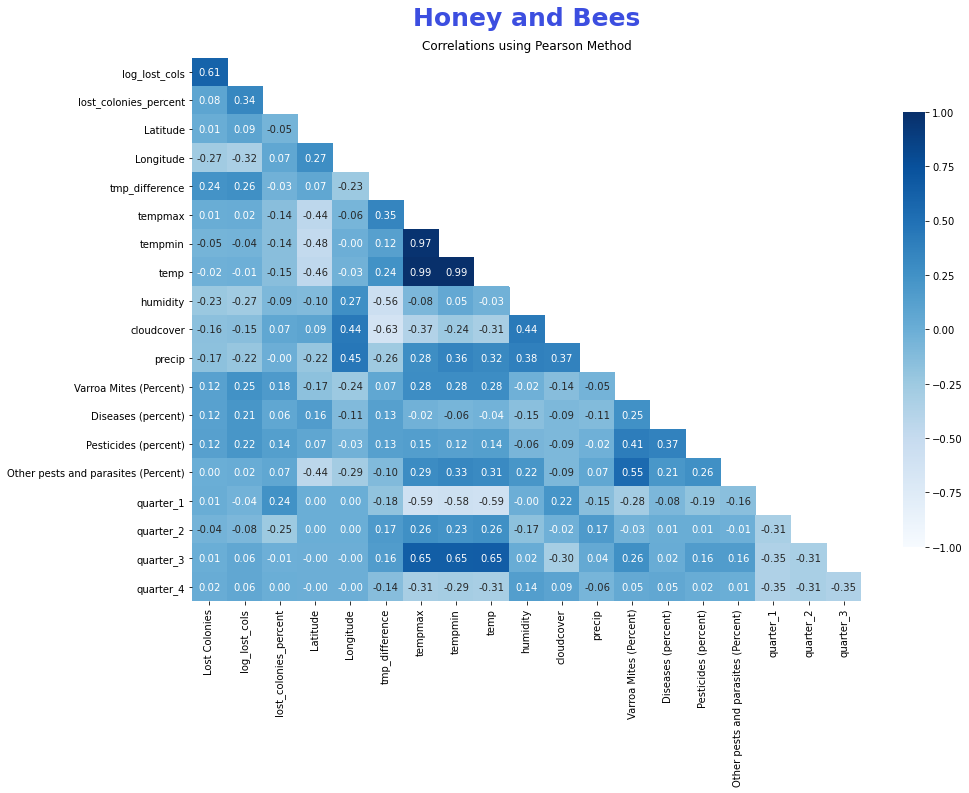

In [510]:
suptitle = "Honey and Bees"
title = "Correlations using Pearson Method"
fig, ax = plt.subplots(figsize=(15,10))

columns = ["Lost Colonies", "log_lost_cols", "lost_colonies_percent", "Latitude", "Longitude", "tmp_difference", "tempmax", "tempmin", "temp", "humidity", "cloudcover", "precip", "Varroa Mites (Percent)", "Diseases (percent)", "Pesticides (percent)", "Other pests and parasites (Percent)",  "quarter_1", "quarter_2", "quarter_3", "quarter_4",]
df = bees_and_weather[columns].corr()

mask = np.triu(np.ones_like(df, dtype=bool))
mask = mask[1:, :-1]

corr = df.iloc[1:,:-1].copy()

ax.text(y=1.05, x=0.5, s=suptitle, c='#3C4EE0', fontsize=25, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(y=1.01, x=0.5, s=title, fontsize=12, alpha=1, ha='center', va='bottom', transform=ax.transAxes)

sns.heatmap(corr, mask=mask, ax=ax, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.yticks(rotation=0)


<u>Why is using a simplistic correlation matrix not advisable?</u>

Primarily, it's because the states vary significantly in size, making it more meaningful to examine covariances that are adjusted for variable sizes, rather than raw correlations.

Additionally, it's essential to remember that correlation doesn't imply causation, and relying solely on correlation matrices can only serve as an initial step in exploring the connections between various outcomes of interest. More importantly, there could be other essential factors (e.g., in a multivariate regression context) that should be considered.

#### 2.4.2 Statewise Correlations - Seasonality & Geography
<u>Consideration:</u> 

Having checked a very simplistic correlation, we need to do some thinking. Our cross-section of states is characterized by heterogeneous geography and climate. Naturally, this also implies seasonality in our quarterly data set. However, due to the large size of the United States, we must not forget that for some southern states, in our data Hawaii’s, seasons are less pronounced than they are in North Dakota 
To visualize this, I am going to compute statewise correlations for “Lost Colonies”, “log Lost Colonies” or “percent Lost Colonies” and sort them by latitude.

In [513]:
# Create a copy of the bees_and_weather dataset
df = bees_and_weather.copy()
statewise_corr = df.groupby(df.index)[columns].corr().unstack(level=1)

In [527]:
bees_and_weather.columns

Index(['State', 'Date', 'Starting Colonies', 'Maximum Colonies',
       'Lost Colonies', 'Added Colonies', 'Renovated Colonies',
       'Percent Renovated', 'Varroa Mites (Percent)',
       'Other pests and parasites (Percent)', 'Diseases (percent)',
       'Pesticides (percent)', 'Other (percent)', 'Unknown (percent)',
       'State_code', 'Latitude', 'Longitude', 'lost_colonies_percent',
       'quarterly_dt', 'latitude', 'longitude', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipcover', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'Group4', 'Group3',
       'quarter_1', 'quarter_2', 'quarter_3', 'quarter_4', 'tmp_difference',
       'log_lost_cols', 'log_max_cols'],
      dtype='object')

In [538]:
# Compute correlation between Lost colonies and temperature for each state
corr_temp_lostcols = bees_and_weather.groupby('Latitude')[['lost_colonies_percent', 'temp']].corr().iloc[0::2, -1]
# Convert the Series object into a Dataframe to facilitate plotting
corr_temp_lostcols_df = corr_temp_lostcols.reset_index()
corr_temp_lostcols_df.columns = ['Latitude', 'Variable', 'Correlation']
corr_temp_lostcols_df

,Latitude,Variable,Correlation
0,20.460000,lost_colonies_percent,0.311772
1,30.973377,lost_colonies_percent,-0.115456
2,31.169336,lost_colonies_percent,-0.085837
3,32.585106,lost_colonies_percent,0.092627
4,32.601011,lost_colonies_percent,0.042151
5,32.678125,lost_colonies_percent,-0.266232
6,33.625050,lost_colonies_percent,-0.158497
7,34.168219,lost_colonies_percent,-0.210716
8,34.751928,lost_colonies_percent,-0.251725
9,35.214563,lost_colonies_percent,-0.489738


In [539]:
# Create plot

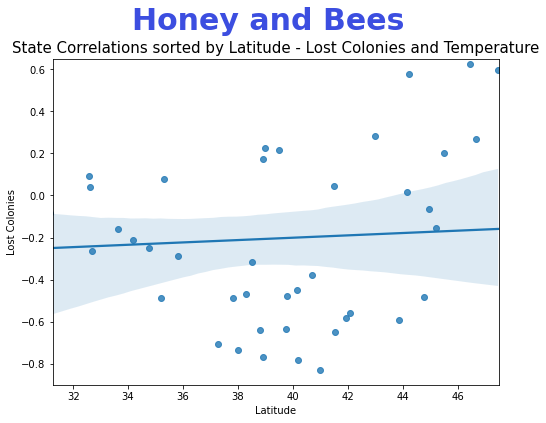

In [551]:
suptitle = "Honey and Bees"
title = "State Correlations sorted by Latitude - Lost Colonies and Temperature"
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x="Latitude", y="Correlation", data=corr_temp_lostcols_df)
plt.suptitle(suptitle, size=30, y=1, c='#3C4EE0', fontweight="bold")
plt.title(title, fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Lost Colonies')

plt.xlim(31.25, 47.5)
plt.ylim(-0.9, 0.65)

plt.show()